# Importing the packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter as c
import seaborn as sns
import missingno as msng
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Data Collections

In [4]:
data=pd.read_csv("/content/drive/MyDrive/chronickidneydisease.csv")

In [5]:
data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [6]:
data.drop(['id'],axis=1,inplace=True)

In [7]:
data.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [8]:
data.columns=['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification']

In [9]:
data.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [10]:
data['classification'].unique()

array(['ckd', 'ckd\t', 'notckd'], dtype=object)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             391 non-null    float64
 1   bp              388 non-null    float64
 2   sg              353 non-null    float64
 3   al              354 non-null    float64
 4   su              351 non-null    float64
 5   rbc             248 non-null    object 
 6   pc              335 non-null    object 
 7   pcc             396 non-null    object 
 8   ba              396 non-null    object 
 9   bgr             356 non-null    float64
 10  bu              381 non-null    float64
 11  sc              383 non-null    float64
 12  sod             313 non-null    float64
 13  pot             312 non-null    float64
 14  hemo            348 non-null    float64
 15  pcv             330 non-null    object 
 16  wc              295 non-null    object 
 17  rc              270 non-null    obj

# Data visualization

In [12]:
from matplotlib import pyplot

In [13]:
data.plot

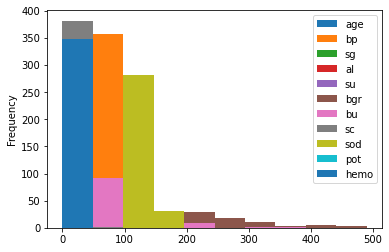

In [14]:
data.plot.hist()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


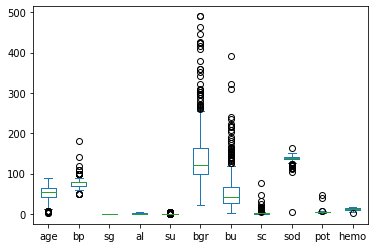

In [17]:
data.plot.box()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


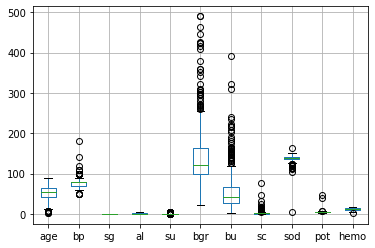

In [18]:
data.boxplot()

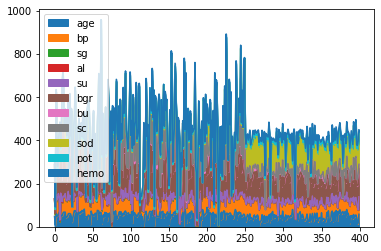

In [19]:
data.plot.area()

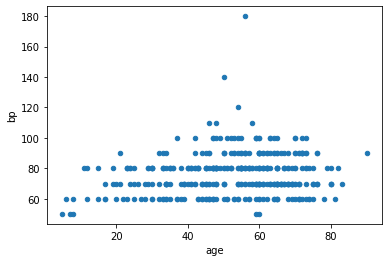

In [21]:
data.plot.scatter(x='age',y='bp')

In [26]:
pie = data

In [27]:
pie

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51,7200,5.9,no,no,no,good,no,no,notckd


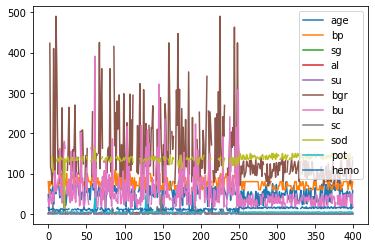

In [30]:
pie.plot();

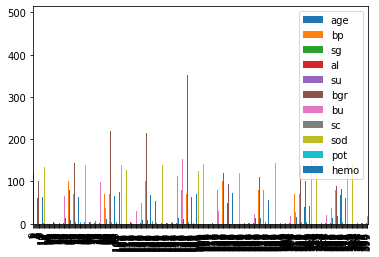

In [33]:
data.plot.bar()

In [36]:
data.corr()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
age,1.000000,0.159480,-0.191096,0.122091,0.220866,0.244992,0.196985,0.132531,-0.100046,0.058377,-0.192928
bp,0.159480,1.000000,-0.218836,0.160689,0.222576,0.160193,0.188517,0.146222,-0.116422,0.075151,-0.306540
sg,-0.191096,-0.218836,1.000000,-0.469760,-0.296234,-0.374710,-0.314295,-0.361473,0.412190,-0.072787,0.602582
al,0.122091,0.160689,-0.469760,1.000000,0.269305,0.379464,0.453528,0.399198,-0.459896,0.129038,-0.634632
su,0.220866,0.222576,-0.296234,0.269305,1.000000,0.717827,0.168583,0.223244,-0.131776,0.219450,-0.224775
bgr,0.244992,0.160193,-0.374710,0.379464,0.717827,1.000000,0.143322,0.114875,-0.267848,0.066966,-0.306189
bu,0.196985,0.188517,-0.314295,0.453528,0.168583,0.143322,1.000000,0.586368,-0.323054,0.357049,-0.610360
sc,0.132531,0.146222,-0.361473,0.399198,0.223244,0.114875,0.586368,1.000000,-0.690158,0.326107,-0.401670
sod,-0.100046,-0.116422,0.412190,-0.459896,-0.131776,-0.267848,-0.323054,-0.690158,1.000000,0.097887,0.365183
pot,0.058377,0.075151,-0.072787,0.129038,0.219450,0.066966,0.357049,0.326107,0.097887,1.000000,-0.133746


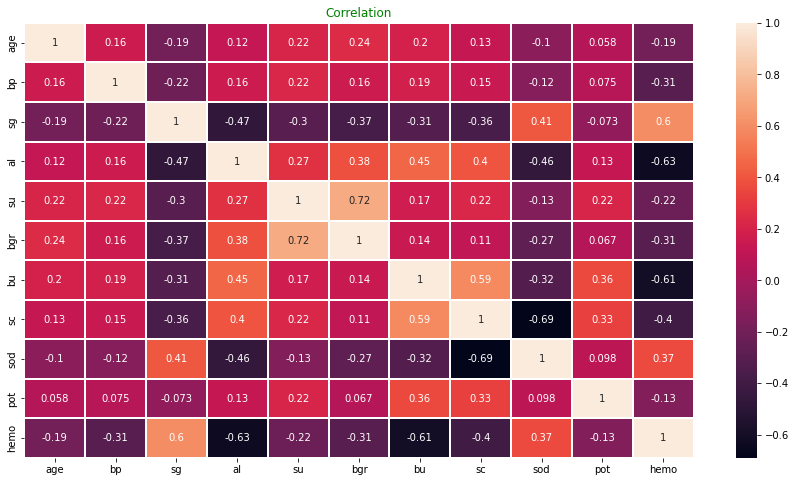

In [38]:
plt.figure(figsize=(15,8));
plt.title("Correlation",color="green")
sns.heatmap(data.corr(),linewidth=1,annot=True);

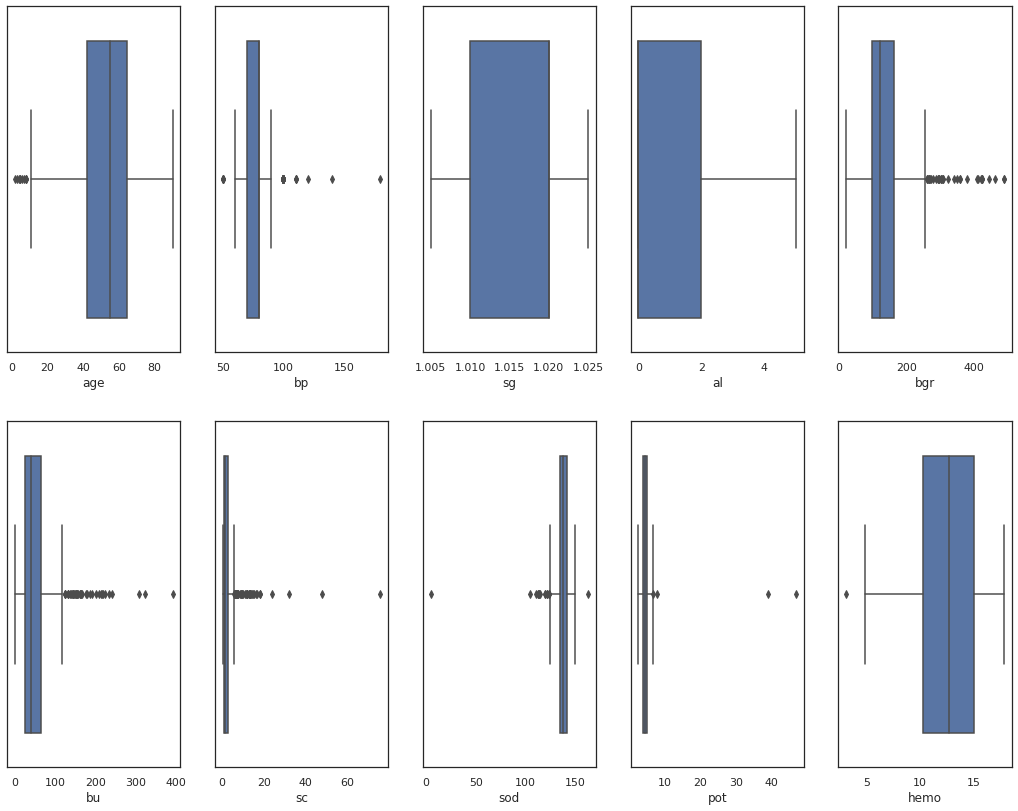

In [41]:
sns.set_theme(style="white")
fig, ((ax1, ax2,ax3,ax4,ax5), (ax6, ax7,ax8,ax9,ax10))= plt.subplots(nrows=2, ncols=5, figsize=(18,14))
sns.boxplot(data=data,x="age",ax=ax1)
sns.boxplot(data=data,x="bp",ax=ax2)
sns.boxplot(data=data,x="sg",ax=ax3)
sns.boxplot(data=data,x="al",ax=ax4)
sns.boxplot(data=data,x="bgr",ax=ax5)
sns.boxplot(data=data,x="bu",ax=ax6)
sns.boxplot(data=data,x="sc",ax=ax7)
sns.boxplot(data=data,x="sod",ax=ax8)
sns.boxplot(data=data,x="pot",ax=ax9)
sns.boxplot(data=data,x="hemo",ax=ax10)

## Data Preprocessing

In [42]:
data['classification']=data['classification'].replace("ckd\t",'ckd')

In [43]:
catcols=set(data.dtypes[data.dtypes=='O'].index.values)

In [44]:
print(catcols)

{'ane', 'dm', 'pcv', 'ba', 'classification', 'rbc', 'wc', 'appet', 'htn', 'rc', 'pcc', 'pc', 'cad', 'pe'}


In [45]:
for i in catcols:
    print("columns:",i)
    print(c(data[i]))
    print('*'*120+'\n')

columns: ane
Counter({'no': 339, 'yes': 60, nan: 1})
************************************************************************************************************************

columns: dm
Counter({'no': 258, 'yes': 134, '\tno': 3, '\tyes': 2, nan: 2, ' yes': 1})
************************************************************************************************************************

columns: pcv
Counter({nan: 70, '52': 21, '41': 21, '44': 19, '48': 19, '40': 16, '43': 14, '45': 13, '42': 13, '32': 12, '36': 12, '33': 12, '28': 12, '50': 12, '37': 11, '34': 11, '35': 9, '29': 9, '30': 9, '46': 9, '31': 8, '39': 7, '24': 7, '26': 6, '38': 5, '47': 4, '49': 4, '53': 4, '51': 4, '54': 4, '27': 3, '22': 3, '25': 3, '23': 2, '19': 2, '16': 1, '\t?': 1, '14': 1, '18': 1, '17': 1, '15': 1, '21': 1, '20': 1, '\t43': 1, '9': 1})
************************************************************************************************************************

columns: ba
Counter({'notpresent': 374, 'present'

In [46]:
catcols.remove('rbc')
catcols.remove('pcv')
catcols.remove('wc')

In [47]:
catcols

{'ane',
 'appet',
 'ba',
 'cad',
 'classification',
 'dm',
 'htn',
 'pc',
 'pcc',
 'pe',
 'rc'}

In [48]:
contcols=set(data.dtypes[data.dtypes!='O'].index.values)

In [49]:
contcols

{'age', 'al', 'bgr', 'bp', 'bu', 'hemo', 'pot', 'sc', 'sg', 'sod', 'su'}

In [50]:
for i in catcols:
    print("continuous columns :",i)
    print(c(data[i]))
    print('*'*120+'\n')

continuous columns : ane
Counter({'no': 339, 'yes': 60, nan: 1})
************************************************************************************************************************

continuous columns : dm
Counter({'no': 258, 'yes': 134, '\tno': 3, '\tyes': 2, nan: 2, ' yes': 1})
************************************************************************************************************************

continuous columns : ba
Counter({'notpresent': 374, 'present': 22, nan: 4})
************************************************************************************************************************

continuous columns : classification
Counter({'ckd': 250, 'notckd': 150})
************************************************************************************************************************

continuous columns : appet
Counter({'good': 317, 'poor': 82, nan: 1})
************************************************************************************************************************

continu

In [51]:
contcols.remove('sg')
contcols.remove('al')
contcols.remove('su')
print(contcols)

{'bgr', 'pot', 'hemo', 'age', 'sod', 'sc', 'bp', 'bu'}


In [52]:
contcols.add('rbc')
contcols.add('pc')
contcols.add('wc')
print(contcols)

{'bgr', 'pot', 'hemo', 'rbc', 'age', 'sod', 'sc', 'wc', 'bp', 'pc', 'bu'}


In [53]:
catcols.add('sg')
catcols.add('al')
catcols.add('su')
print(catcols)

{'ane', 'dm', 'ba', 'classification', 'sg', 'al', 'appet', 'su', 'htn', 'rc', 'pcc', 'pc', 'cad', 'pe'}


In [54]:
data['cad']=data.cad.replace('\tno','no')

In [55]:
c(data['cad'])

Counter({'no': 364, 'yes': 34, nan: 2})

In [56]:
data['dm']=data.dm.replace(to_replace={'\tno':'no','\tyes':'yes',' yes':'yes'})
c(data['dm'])

Counter({'yes': 137, 'no': 261, nan: 2})

In [57]:
data.isna().any()

age                True
bp                 True
sg                 True
al                 True
su                 True
rbc                True
pc                 True
pcc                True
ba                 True
bgr                True
bu                 True
sc                 True
sod                True
pot                True
hemo               True
pcv                True
wc                 True
rc                 True
htn                True
dm                 True
cad                True
appet              True
pe                 True
ane                True
classification    False
dtype: bool

In [58]:
data.isna().sum()

age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [59]:
data.pcv=pd.to_numeric(data.pcv,errors='coerce')
data.wc=pd.to_numeric(data.wc,errors='coerce')
data.rc=pd.to_numeric(data.rc,errors='coerce')

In [60]:
data['bgr'].fillna(data['bgr'].mean(),inplace=True)
data['bp'].fillna(data['bp'].mean(),inplace=True)
data['bu'].fillna(data['bu'].mean(),inplace=True)
data['hemo'].fillna(data['hemo'].mean(),inplace=True)
data['pcv'].fillna(data['pcv'].mean(),inplace=True)
data['pot'].fillna(data['pot'].mean(),inplace=True)
data['rc'].fillna(data['rc'].mean(),inplace=True)
data['sc'].fillna(data['sc'].mean(),inplace=True)
data['sod'].fillna(data['sod'].mean(),inplace=True)
data['wc'].fillna(data['wc'].mean(),inplace=True)

In [61]:
data['age'].fillna(data['age'].mode()[0],inplace=True)
data['htn'].fillna(data['htn'].mode()[0],inplace=True)
data['pcc'].fillna(data['pcc'].mode()[0],inplace=True)
data['appet'].fillna(data['appet'].mode()[0],inplace=True)
data['al'].fillna(data['al'].mode()[0],inplace=True)
data['pc'].fillna(data['pc'].mode()[0],inplace=True)
data['rbc'].fillna(data['rbc'].mode()[0],inplace=True)
data['cad'].fillna(data['cad'].mode()[0],inplace=True)
data['ba'].fillna(data['ba'].mode()[0],inplace=True)
data['ane'].fillna(data['ane'].mode()[0],inplace=True)
data['su'].fillna(data['su'].mode()[0],inplace=True)
data['dm'].fillna(data['dm'].mode()[0],inplace=True)
data['pe'].fillna(data['pe'].mode()[0],inplace=True)
data['sg'].fillna(data['sg'].mode()[0],inplace=True)

# Splitting the dataset 

In [63]:
for i in catcols:
    print("LABEL ENCODING OF :",i)
    le=LabelEncoder()
    print(c(data[i]))
    data[i]=le.fit_transform(data[i])
    print(c(data[i]))
    print('*'*100)

LABEL ENCODING OF : ane
Counter({0: 340, 1: 60})
Counter({0: 340, 1: 60})
****************************************************************************************************
LABEL ENCODING OF : dm
Counter({0: 263, 1: 137})
Counter({0: 263, 1: 137})
****************************************************************************************************
LABEL ENCODING OF : ba
Counter({0: 378, 1: 22})
Counter({0: 378, 1: 22})
****************************************************************************************************
LABEL ENCODING OF : classification
Counter({0: 250, 1: 150})
Counter({0: 250, 1: 150})
****************************************************************************************************
LABEL ENCODING OF : sg
Counter({3: 153, 1: 84, 4: 81, 2: 75, 0: 7})
Counter({3: 153, 1: 84, 4: 81, 2: 75, 0: 7})
****************************************************************************************************
LABEL ENCODING OF : al
Counter({0: 245, 1: 44, 2: 43, 3: 43, 4: 24, 5: 1}

In [64]:
data['rbc']=le.fit_transform(data['rbc'])

In [65]:
selcols=['rbc','pc','bgr','bu','pe','ane','dm','cad']
x=pd.DataFrame(data,columns=selcols)
y=pd.DataFrame(data,columns=['classification'])
print(x.shape)
print(y.shape)

(400, 8)
(400, 1)


In [66]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=2)

In [67]:
xtrain

,rbc,pc,bgr,bu,pe,ane,dm,cad
205,1,1,100.000000,28.0,0,0,1,0
354,1,1,102.000000,17.0,0,0,0,0
3,1,0,117.000000,56.0,1,1,0,0
264,1,1,132.000000,24.0,0,0,0,0
194,1,0,148.036517,49.0,0,0,1,0
...,...,...,...,...,...,...,...,...
299,1,1,127.000000,48.0,0,0,0,0
22,1,0,95.000000,163.0,0,1,0,0
72,1,0,148.036517,35.0,1,0,1,0
15,1,1,76.000000,162.0,0,1,0,0


In [68]:
lgr=LogisticRegression()
lgr.fit(xtrain.values,ytrain.values)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [69]:
ypred=lgr.predict(xtest)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [70]:
ypred1=lgr.predict([[129,99,1,0,0,1,0,1]])
print(ypred1)
c(ypred)

[1]


Counter({0: 48, 1: 32})

In [71]:
print(accuracy_score(ytest,ypred)*100)

92.5


In [72]:
confmat=confusion_matrix(ytest,ypred)
confmat

array([[48,  6],
       [ 0, 26]])

In [73]:
from sklearn.metrics import classification_report

In [75]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94        54
           1       0.81      1.00      0.90        26

    accuracy                           0.93        80
   macro avg       0.91      0.94      0.92        80
weighted avg       0.94      0.93      0.93        80



In [82]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lgr, xtrain, ytrain, cv=50)
print('Cross-Validation Accuracy Scores', scores)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example

Cross-Validation Accuracy Scores [0.85714286 0.85714286 0.85714286 0.71428571 1.         1.
 0.85714286 1.         0.85714286 0.71428571 1.         0.85714286
 0.85714286 0.85714286 0.85714286 1.         1.         1.
 0.85714286 1.         1.         1.         1.         1.
 0.83333333 0.83333333 1.         1.         1.         1.
 0.83333333 0.83333333 0.66666667 0.83333333 1.         0.83333333
 1.         1.         0.83333333 0.83333333 0.83333333 1.
 1.         0.83333333 1.         0.83333333 0.66666667 0.83333333
 1.         1.        ]


# Model Connection

In [83]:
import pickle

In [84]:
pickle.dump(lgr,open('/content/drive/MyDrive/CKD.pkl','wb'))